# Exploratory Analysis

In this exploratory data analysis, we will examine the structure and characteristics of the dataset, including its size, distribution of variables, and any missing or abnormal values. We will also create visualizations to help identify patterns and relationships between variables. The insights gained from this analysis will be used to guide the development of hypotheses and the choice of statistical models for our subsequent analysis.

## Data Preparation

In [1]:
%run functions.py

In [4]:
# set global random seed
rand = 3
os.environ['PYTHONHASHSEED']=str(rand)
np.random.seed(rand)

We use the `Compas-scores-two-years` dataset published by ProPublica and apply the same data filter used by them to create a new dataframe compas_df. The dataset contains information on defendants charged with a crime and assessed using the COMPAS risk assessment tool. The data includes demographic information, criminal history, and the results of the COMPAS assessment, including a predicted risk score and likelihood of recidivism over a two-year period. The filter selects only the rows from the data where the number of days between the arrest and the screening is within the range of -30 to 30, the value in the is_recid column is not -1, the value in the c_charge_degree column is not "O", and the value in the score_text column is not "N/A".

In [5]:
dataURL = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
raw_data = pd.read_csv(dataURL)
raw_data.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [6]:
compas_df = raw_data.loc[
    (raw_data['days_b_screening_arrest'] <= 30) &
    (raw_data['days_b_screening_arrest'] >= -30) &
    (raw_data['is_recid'] != -1) &
    (raw_data['c_charge_degree'] != "O") &
    (raw_data['score_text'] != "N/A")
]
compas_df.shape

(6172, 53)

### Race Variables

Initially, we assess the distribution of Race Variables 

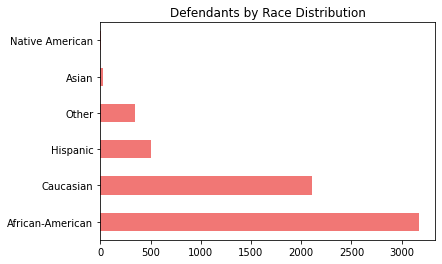

In [10]:
compas_df['race'].value_counts().plot(
    title = "Defendants by Race Distribution",
    kind= "barh", 
    color = "#f17775")

It can be clearly seen from the graph that the sample is unbalanced with regards to the race feature, where the sample data of COMPAS have extremely small representation of Asian and Native American. According to the US Census data, Asians make up about 5.23% of the nation’s overall population in 2014; in the ProPublica, however, they accounts for only 0.5% of the data.

In [7]:
value_counts = compas_df['race'].value_counts()
percentage = np.round(value_counts / len(compas_df) * 100,3)

table = pd.concat([value_counts, percentage], axis=1)
table.columns = ['Value Counts', 'Percentage']
print("Race Distribution of Defendants")
print(table)

Race Distribution of Defendants
                  Value Counts  Percentage
African-American          3175      51.442
Caucasian                 2103      34.073
Hispanic                   509       8.247
Other                      343       5.557
Asian                       31       0.502
Native American             11       0.178


### Sex Variables

That there is a significant imbalance in the distribution of males and females in the sample population, with males accounting for approximately 81% of the sample and females accounting for approximately 19%. 

<AxesSubplot:title={'center':'Defendants by Sex Distribution'}>

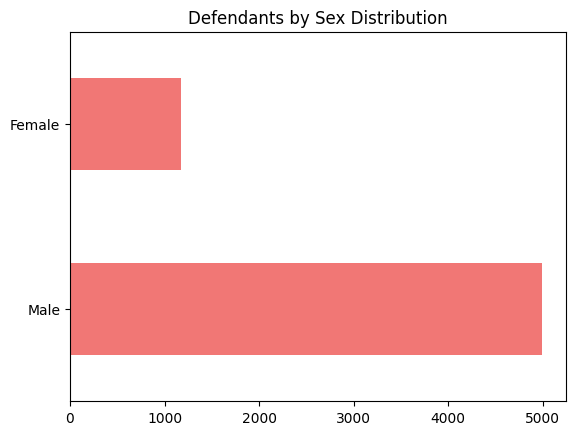

In [10]:
compas_df['sex'].value_counts().plot(
    title = "Defendants by Sex Distribution",
    kind= "barh", 
    color = "#f17775")

In [11]:
value_counts = compas_df['sex'].value_counts()
percentage = np.round(value_counts / len(compas_df) * 100,3)

table = pd.concat([value_counts, percentage], axis=1)
table.columns = ['Value Counts', 'Percentage']
print("Sex Distribution of Defendants")
print(table)

Sex Distribution of Defendants
        Value Counts  Percentage
Male            4997      80.962
Female          1175      19.038


In [46]:
df['two_year_recid'].value_counts()

0    3363
1    2809
Name: two_year_recid, dtype: int64

### Age Variable

Histogram shows that most of the defendants in the COMPAS data are between the ages of 25 and 35, with a concentration of ages towards the younger end of this range. This type of distribution can indicate that the population of defendants in the COMPAS data is relatively young, with fewer older defendants. 

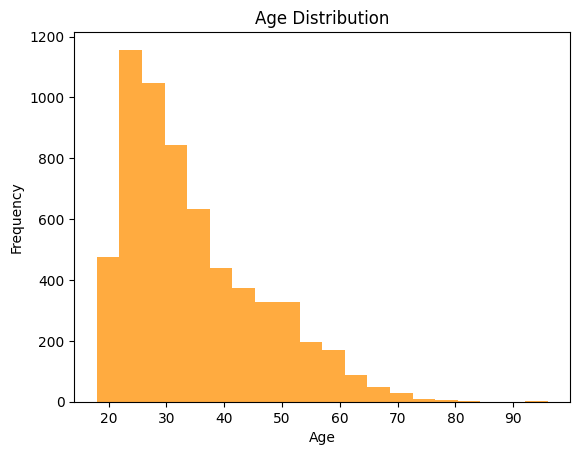

In [90]:
plt.hist(compas_df['age'], bins=20, color='#ffab40')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Given that African American and Caucasian groups are the predominant populations in our dataset, we will analyze age distributions within these two populations to gain a deeper understanding of their demographic structures.

In [25]:
# to customize the histogram color
import matplotlib.cm as cm
import matplotlib.colors as colors

def hist_color(color_code_start, color_code_end, n):
    cmap = cm.colors.LinearSegmentedColormap.from_list("MyColorMap", [color_code_start, color_code_end], N = n)
    colors_array = cmap(colors.Normalize()(range(n)))
    color_codes = [colors.to_hex(c) for c in colors_array]
    return color_codes

<AxesSubplot:title={'center':'Age Distribution by Race'}, xlabel='race', ylabel='Number of Defendants'>

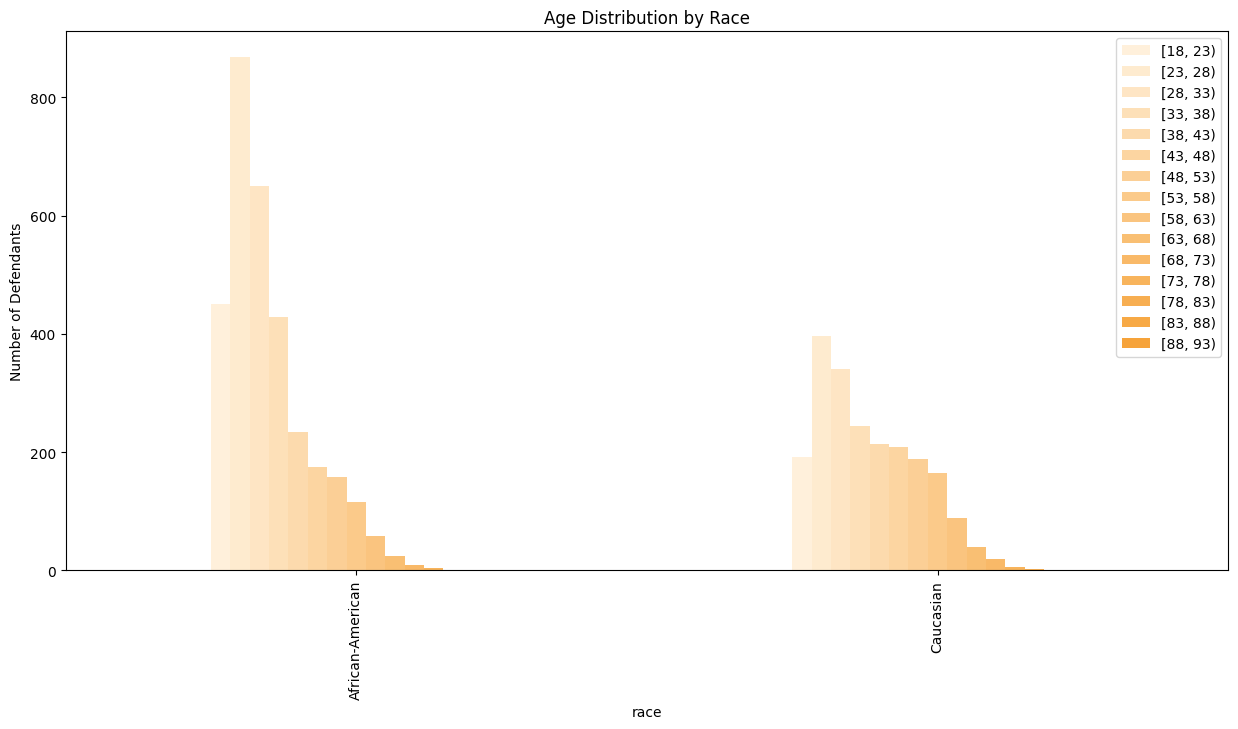

In [68]:
min_age = int(compas_df['age'].min())
max_age = int(compas_df['age'].max())
age_bins = np.arange(min_age, max_age+1, 5)

compas_df[compas_df['race'].isin(["African-American","Caucasian"])].groupby('race')['age'].apply(lambda x: pd.cut(x, bins = age_bins, right = False).value_counts(normalize = False)).unstack().plot(
    kind='bar', 
    color = hist_color('#fff0db', '#f38800', 20),
    figsize=(15, 7),
    title='Age Distribution by Race', 
    ylabel='Number of Defendants'
)

### Decile Scores

Next, we examine the distribution of COMPAS decile scores across different racial groups in relation to recidivism.

<AxesSubplot:title={'center':'Score Text by Race'}, xlabel='Race', ylabel='Score Text'>

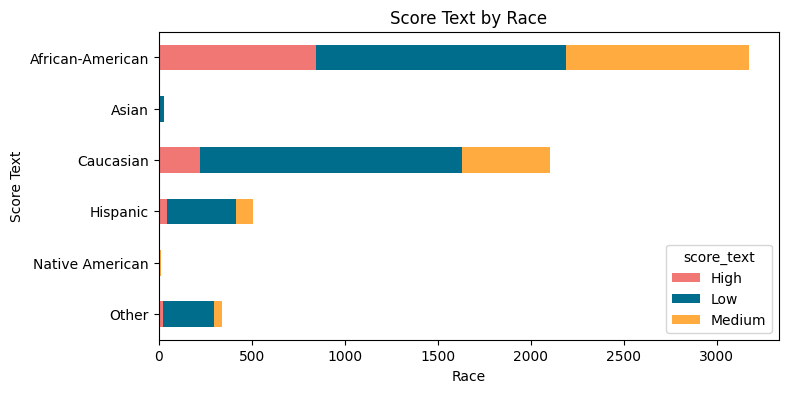

In [8]:
score_text_by_race = compas_df.groupby(['race','score_text'], sort = True)['id'].size()
score_text_by_race.unstack().sort_values(by="race", ascending=False).plot(
    kind = "barh", 
    title = "Score Text by Race",
    ylabel = "Score Text",
    xlabel = "Race",
    color = ["#f17775", "#016d8c", "#ffab40"],
    figsize = (8,4),
    stacked = True
)

African American defendants have the highest number of individuals classified with high scores. However, it is important to consider that African Americans make up the largest racial group in this dataset, representing 51.442% of the total. To better understand the distribution of decile scores among different racial groups, we plotted the histogram as below. The chart eveals a noticeable pattern. As the decile score increases, the proportion of defendants from both the Caucasian and 'Other' racial groups decreases. However, this trend is not observed in the African American group, where the proportion of defendants remains relatively stable across different decile scores.

<AxesSubplot:title={'center':'Decile Score Histogram by Race'}, xlabel='race'>

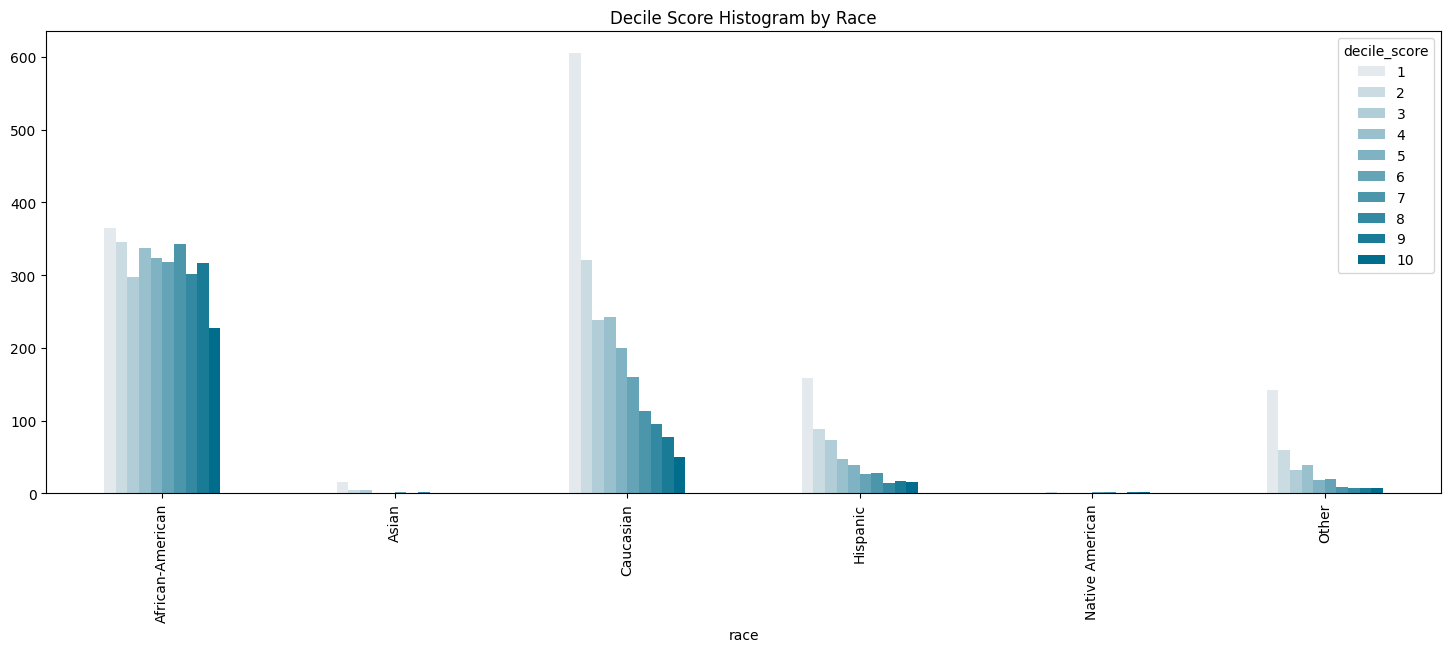

In [72]:
compas_df.groupby('race')['decile_score'].value_counts(normalize = False).unstack().plot(
    kind='bar', 
    color = hist_color('#e3e9ed', '#016d8c',10),
    figsize=(18, 6),
    title='Decile Score Histogram by Race'
)

### Priors_Count Variable

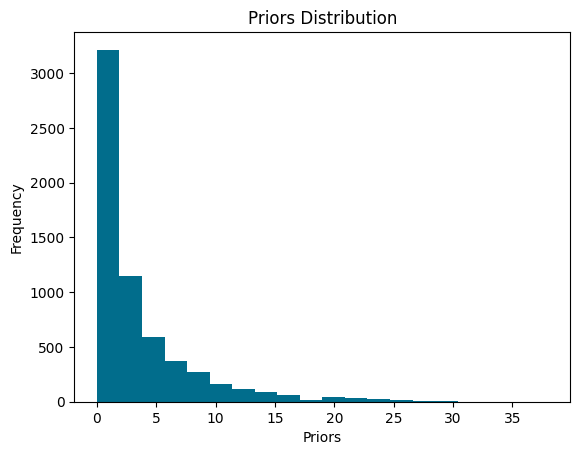

In [62]:
plt.hist(compas_df['priors_count'], bins=20, color='#016d8c')
plt.title("Priors Distribution")
plt.xlabel("Priors")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:title={'center':'"Priors Count" Distribution by Race'}, xlabel='race', ylabel='Number of Defendants'>

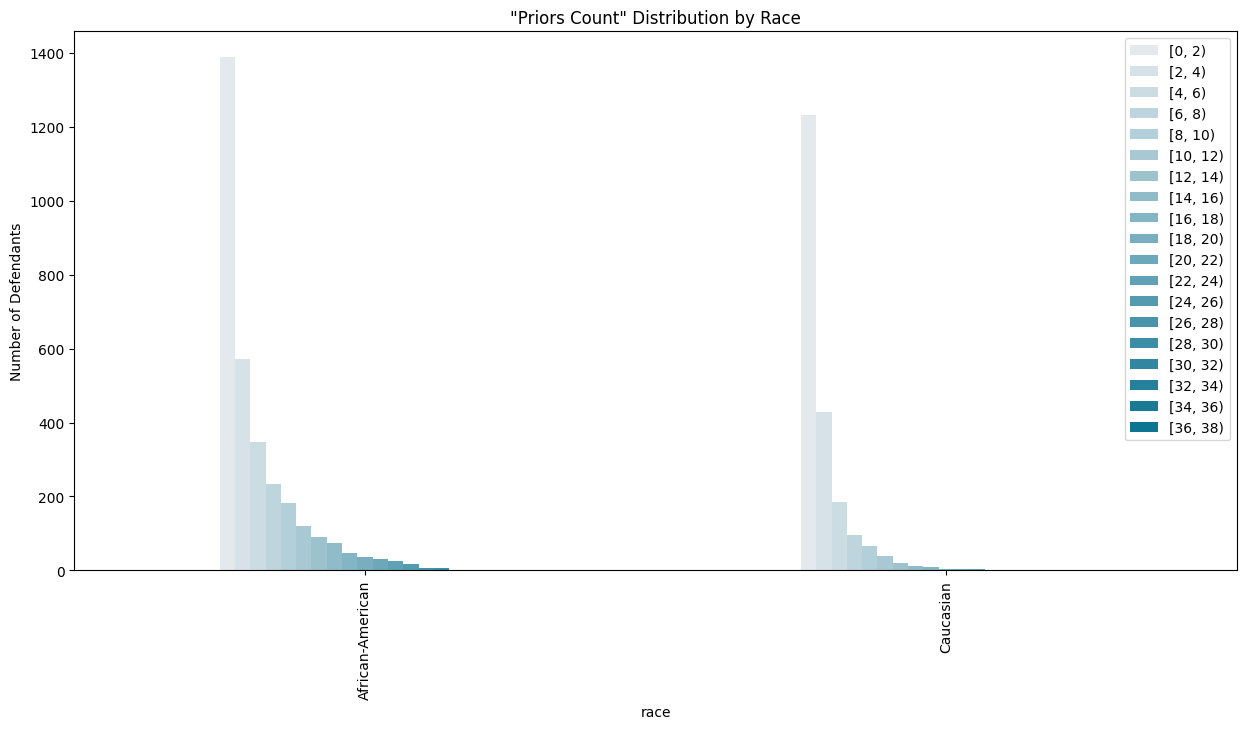

In [70]:
min_priors = int(compas_df['priors_count'].min())
max_priors = int(compas_df['priors_count'].max())
count_bins = np.arange(min_priors, max_priors + 1, 2)

compas_df[compas_df['race'].isin(["African-American","Caucasian"])].groupby('race')['priors_count'].apply(lambda x: pd.cut(x, bins = count_bins, right = False).value_counts(normalize = False)).unstack().plot(
    kind='bar', 
    color = hist_color('#e3e9ed', '#016d8c',20),
    figsize=(15, 7),
    title='"Priors Count" Distribution by Race', 
    ylabel='Number of Defendants'
)


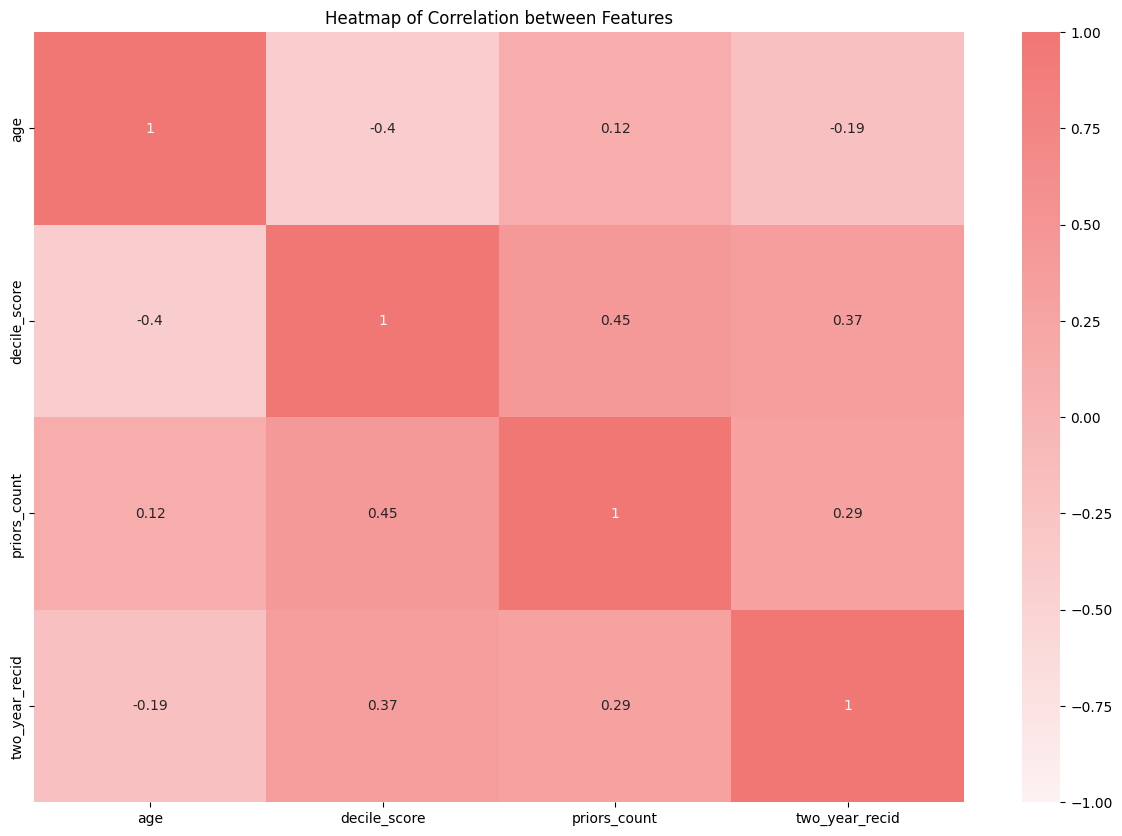

In [86]:

import matplotlib.colors as mcolors

colors = ['#fdf2f2', '#f17775']
cmap = mcolors.LinearSegmentedColormap.from_list("", colors)

plt.figure(figsize=(15, 10))
sns.heatmap(compas_df[['age', 'race', 'sex', 'decile_score', 'priors_count', 'two_year_recid']].corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Heatmap of Correlation between Features')
plt.show()

In this exploratory data analysis, we will examine the structure and characteristics of the dataset, including its size, distribution of variables, and any missing or abnormal values. We will also create visualizations to help identify patterns and relationships between variables. The insights gained from this analysis will be used to guide the development of hypotheses and the choice of statistical models for our subsequent analysis.

<AxesSubplot:title={'center':'Defendants by Race Distribution'}>

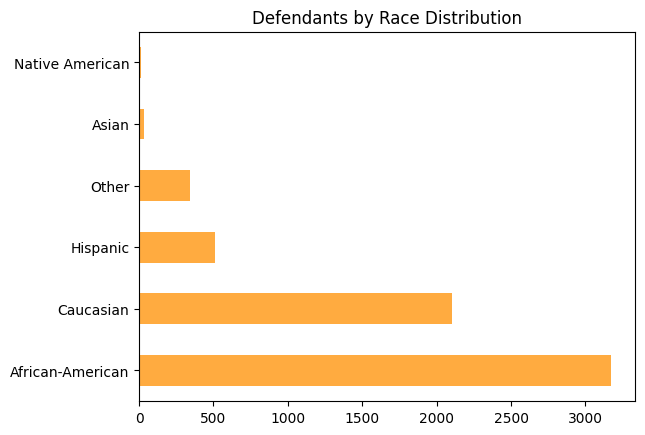

In [6]:
compas_df['race'].value_counts().plot(
    title = "Defendants by Race Distribution",
    kind= "barh", 
    color = "#ffab40")

It can be clearly seen from the graph that the sample is unbalanced with regards to the race feature, where the sample data of COMPAS have extremely small representation of Asian and Native American. According to the US Census data, Asians make up about 5.23% of the nation’s overall population in 2014; in the ProPublica, however, they accounts for only 0.5% of the data.

In [7]:
value_counts = compas_df['race'].value_counts()
percentage = np.round(value_counts / len(compas_df) * 100,3)

table = pd.concat([value_counts, percentage], axis=1)
table.columns = ['Value Counts', 'Percentage']
print("Race Distribution of Defendants")
print(table)

Race Distribution of Defendants
                  Value Counts  Percentage
African-American          3175      51.442
Caucasian                 2103      34.073
Hispanic                   509       8.247
Other                      343       5.557
Asian                       31       0.502
Native American             11       0.178


Next, we examine the distribution of COMPAS decile scores across different racial groups in relation to recidivism.

<AxesSubplot:title={'center':'Score Text by Race'}, xlabel='Race', ylabel='Score Text'>

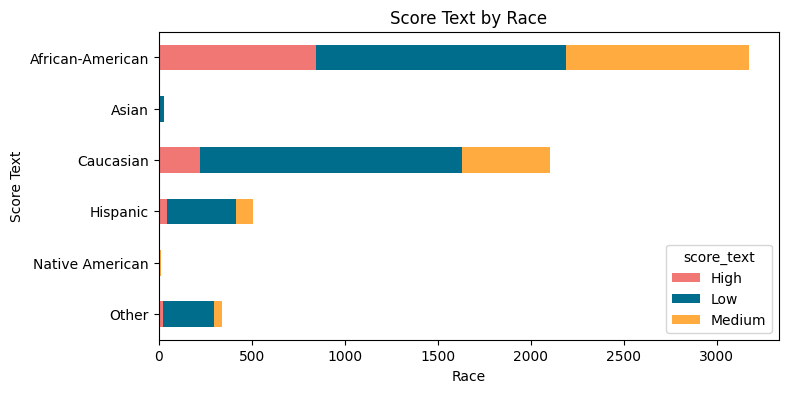

In [8]:
score_text_by_race = compas_df.groupby(['race','score_text'], sort = True)['id'].size()
score_text_by_race.unstack().sort_values(by="race", ascending=False).plot(
    kind = "barh", 
    title = "Score Text by Race",
    ylabel = "Score Text",
    xlabel = "Race",
    color = ["#f17775", "#016d8c", "#ffab40"],
    figsize = (8,4),
    stacked = True
)

African American defendants have the highest number of individuals classified with high scores. However, it is important to consider that African Americans make up the largest racial group in this dataset, representing 51.442% of the total.

<AxesSubplot:title={'center':'Decile Score Histogram by Race'}, xlabel='race', ylabel='% with Decile Score'>

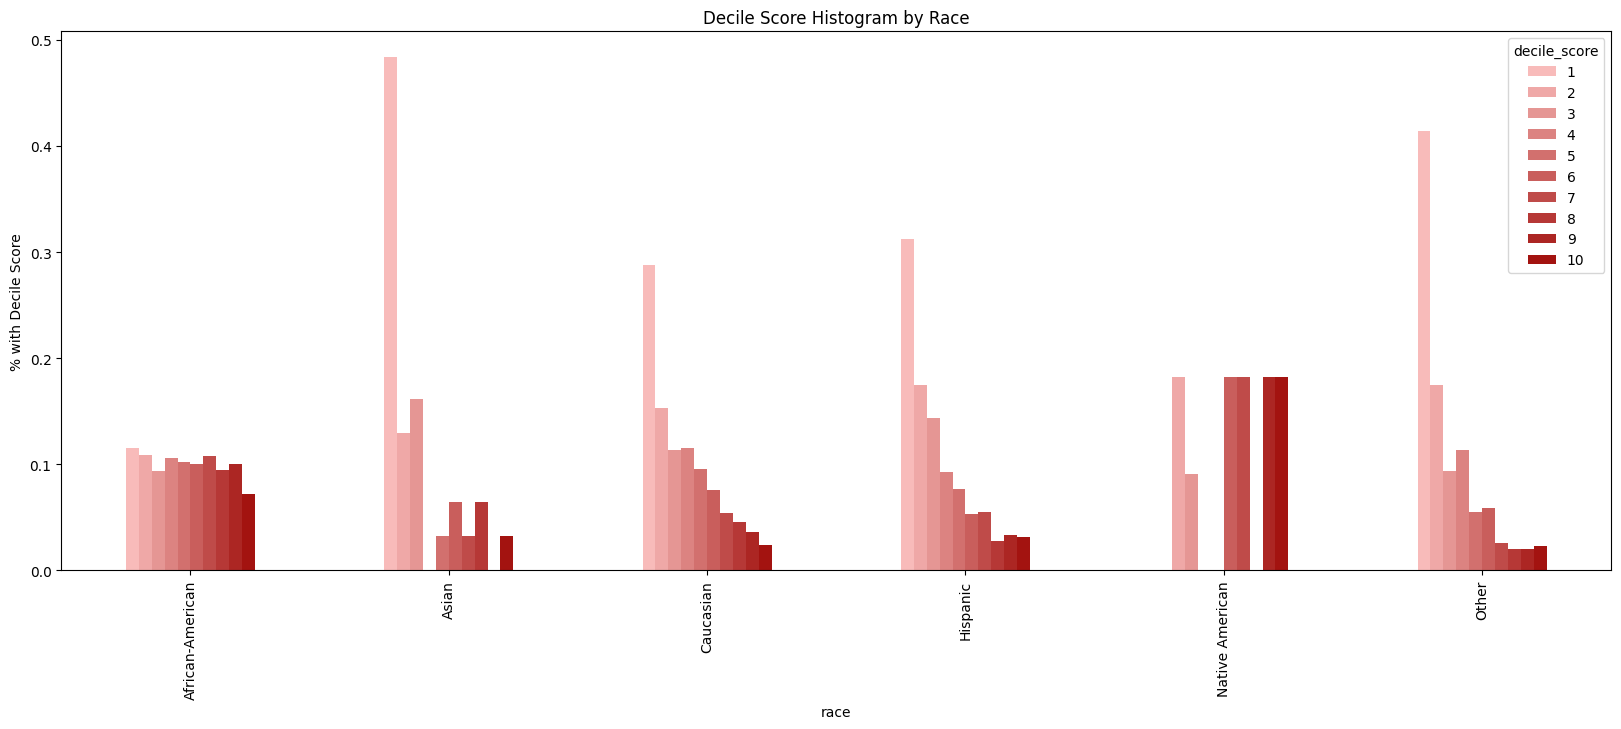

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as colors

cmap = cm.colors.LinearSegmentedColormap.from_list("MyColorMap", ['#F8BBBA', '#A31310'], N=10)
colors_array = cmap(colors.Normalize()(range(10)))
color_codes = [colors.to_hex(c) for c in colors_array]

compas_df.groupby('race')['decile_score'].value_counts(normalize=True).unstack().plot(
    kind='bar', 
    color = color_codes,
    figsize=(20, 7),
    title='Decile Score Histogram by Race', 
    ylabel='% with Decile Score'
)

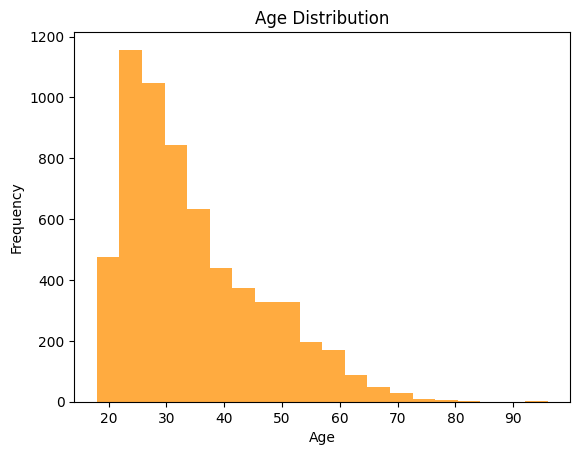

In [10]:
plt.hist(compas_df['age'], bins=20, color='#ffab40')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Histogram shows that most of the defendants in the COMPAS data are between the ages of 25 and 35, with a concentration of ages towards the younger end of this range. This type of distribution can indicate that the population of defendants in the COMPAS data is relatively young, with fewer older defendants. 

Markus Waser, “Nonlinear Dependencies in and between Time Series” retrieved from: https://publik.tuwien.ac.at/files/PubDat_189752.pdf<br>

Patrick Hall, “Predictive modeling: Striking a balance between accuracy and interpretability”. Retrieved from: https://www.oreilly.com/content/predictive-modeling-striking-a-balance-between-accuracy-and-interpretability/<br>

Chunrong Ai and Edward C. Norton, “Computing interaction effects and standard errors in logit and Probit models” retrieved from: https://hhstokes.people.uic.edu/ftp/e535/probit/NortonWangAi.pdf<br>

Jerome H. Friedman, "Greedy function approximation: A gradient boosting machine.." Ann. Statist. 29 (5) 1189 - 1232, October 2001. Retrieved from: https://doi.org/10.1214/aos/1013203451<br>

Molnar, Christoph. “Interpretable Machine Learning: A Guide for Making Black Box Models Explainable” (2022): Chapter: Permutation Feature Importance
Slundberg/shap · GitHub<br>

Rudin, Cynthia. “Stop Explaining Black Box Machine Learning Models for High Stakes Decisions and use Interpretable Models Instead” (2019): Nature Machine Intelligence. Retrieved from: https://arxiv.org/abs/1811.10154 <br>

Ai, C., & Norton, E. C. (2004). Computing interaction effects and standard errors in logit and Probit models. Retrieved January 15, 2023, from https://hhstokes.people.uic.edu/ftp/e535/probit/NortonWangAi.pdf.

Oh, S. (2019). Feature Interaction in Terms of Prediction Performance. Applied Sciences, 9(23), 5191. https://doi.org/10.3390/app9235191

Friedman, Jerome H. (2001): Greedy function approximation: A gradient boosting machine… Ann. Statist. 29 (5) 1189 - 1232. Retrieved January 15, 2023, from https://doi.org/10.1214/aos/1013203451/

Molnar, Christoph (2022): Interpretable Machine Learning: A Guide for Making Black Box Models Explainable. Retrieved January 12, 2023, from  https://christophm.github.io/interpretable-ml-book/feature-importance.html

Lundberg, S. (2020, December 18). Welcome to the SHAP documentation Retrieved from https://github.com/slundberg/shap/blob/master/docs/index.rst